In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
def string_to_np_array(s):
    # Remove the brackets from the string
    s = s.strip('[]')
    # Split the string by spaces
    split_string = s.split()
    # Convert each substring to a float
    float_values = [float(substring) for substring in split_string]
    # Convert the list of floats to a numpy array
    np_array = np.array(float_values)
    return np_array

def get_row_arrs(df, i):
    ls = []
    # Select row i using iloc
    row = df.iloc[i]
    # Iterate over each element in the row
    for column in df.columns:
        ls.append(string_to_np_array(row[column]))
    return ls

In [116]:


SELECTED_ROW = 5

df = pd.read_csv('final_results.csv', header=None)
print(df.shape)
ls = get_row_arrs(df, SELECTED_ROW)
vec_8021 = ls[0]
vec_9403 = ls[1]
vec_9398 = ls[2]
vec_9412 = ls[3]
vec_8010 = ls[4]


(6, 5)


In [117]:
# Combine the vectors into a single dataset
data = np.vstack([vec_8021, vec_9403, vec_9398, vec_9412, vec_8010])

# Generate labels for the x-axis (dimension index)
dimension_labels = np.arange(1, len(vec_8021) + 1)

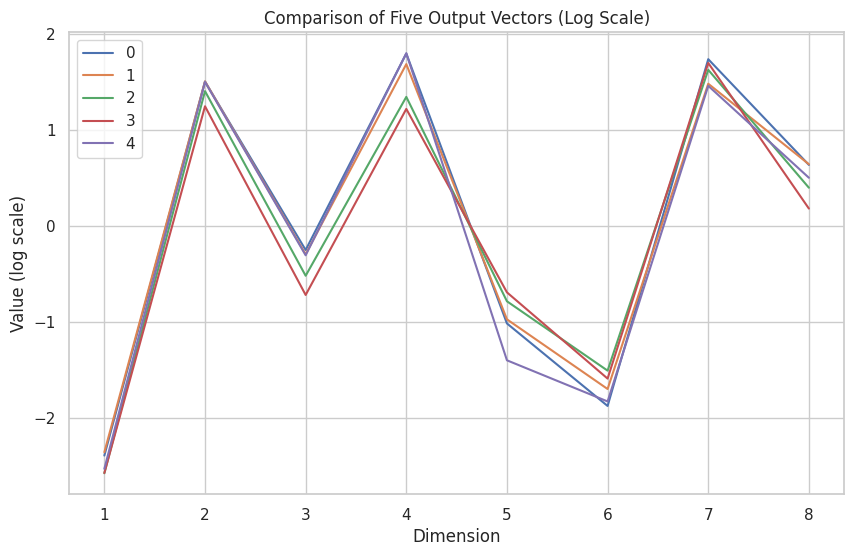

In [118]:
# Set up the seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=np.log10(data.T), dashes=False)

# Set the x-axis labels
plt.xticks(np.arange(len(dimension_labels)), dimension_labels)

# Add plot title and axes labels
plt.title("Comparison of Five Output Vectors (Log Scale)")
plt.xlabel("Dimension")
plt.ylabel("Value (log scale)")

# Display the plot
plt.show()

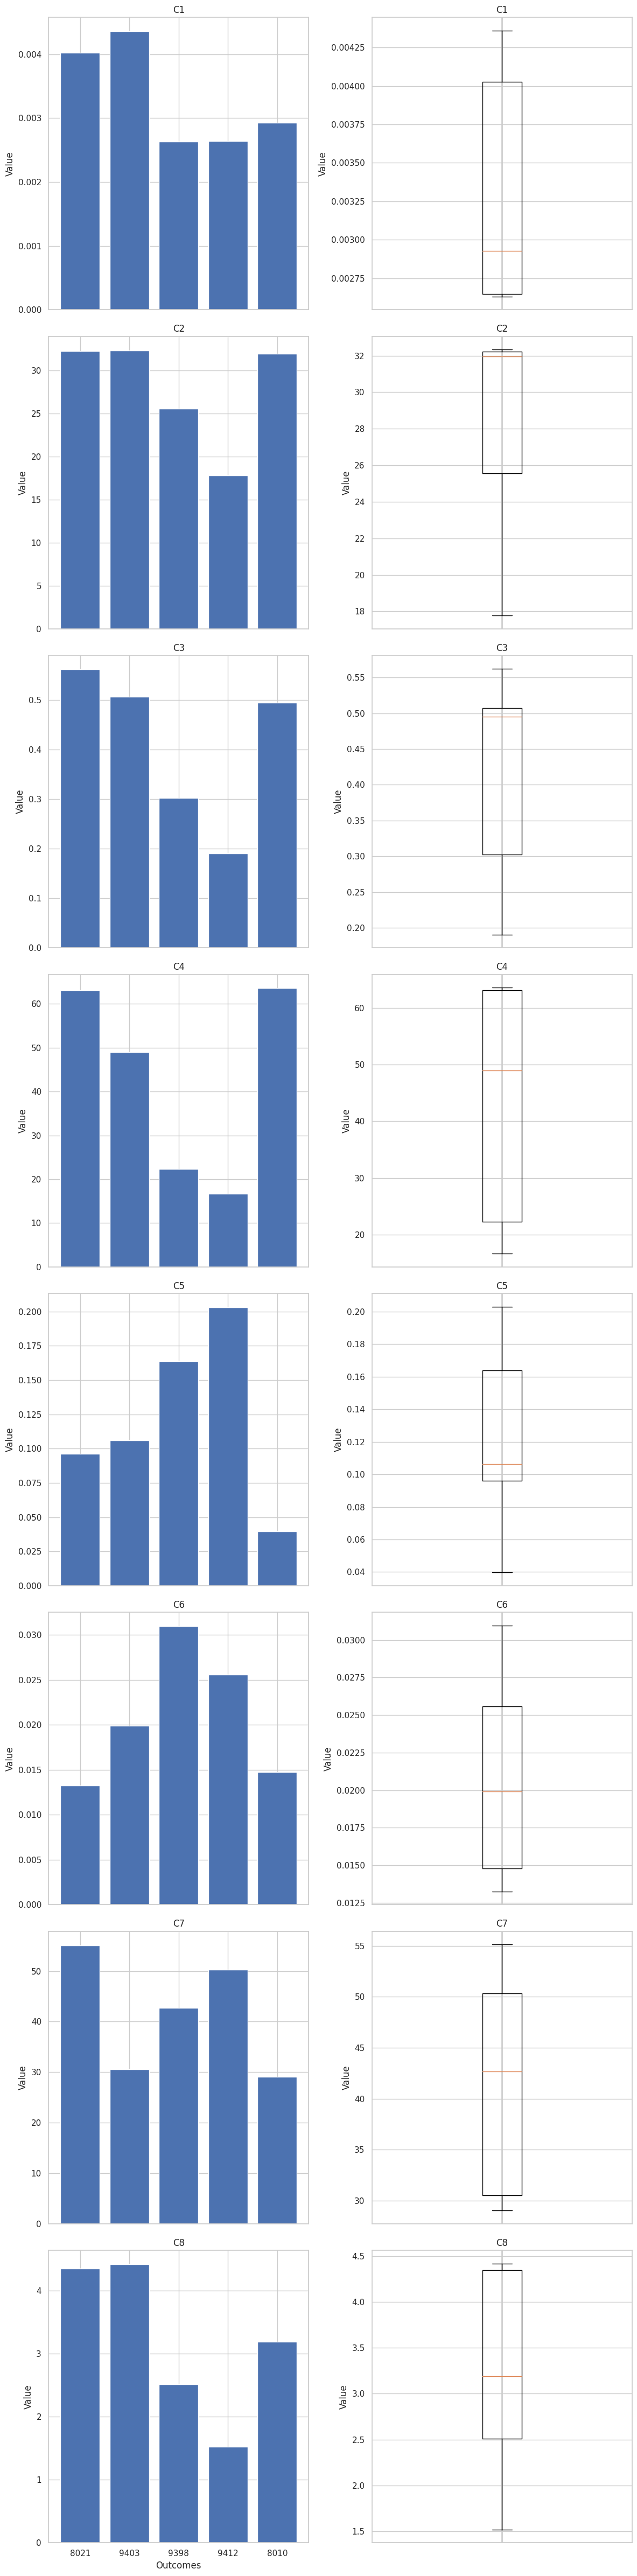

In [119]:
# Output vector labels
output_labels = ['8021', '9403', '9398', '9412', '8010']

# Set up the figure and subplots
fig, axs = plt.subplots(len(dimension_labels), 2, figsize=(12, 6 * len(dimension_labels)), sharex='col')

# Iterate through each dimension
for dim in range(len(dimension_labels)):
    # Get the values for the current dimension across all outcomes
    values = data[:, dim]

    # Set the x-axis range and tick labels for the bar plot
    x = np.arange(len(values))
    x_labels = output_labels

    # Create a bar plot for the current dimension
    axs[dim, 0].bar(x, values)

    # Set the x-axis labels for the bar plot
    axs[dim, 0].set_xticks(x)
    axs[dim, 0].set_xticklabels(x_labels)

    # Set the y-axis label for the bar plot
    axs[dim, 0].set_ylabel('Value')

    # Set the title for the current dimension
    axs[dim, 0].set_title('C{}'.format(dimension_labels[dim]))

    # Create a box plot for the current dimension
    axs[dim, 1].boxplot(data[:, dim], vert=True)

    # Set the x-axis label for the box plot
    axs[dim, 1].set_xticklabels([])

    # Set the y-axis label for the box plot
    axs[dim, 1].set_ylabel('Value')

    # Set the title for the box plot
    axs[dim, 1].set_title('C{}'.format(dimension_labels[dim]))

# Set the common x-axis label for the bar plots
axs[-1, 0].set_xlabel('Outcomes')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()